In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
data = pd.read_csv('output/dms/grid_search_results/jones_scaling_lab_esm2.csv')
data.head()

,simulation_num,round_num,num_mutants_per_round,first_round_strategy,measured_var,learning_strategy,regression_type,embedding_type,test_error,train_error,...,test_r_squared,alpha,spearman_corr,median_activity_scaled,top_activity_scaled,activity_binary_percentage,top_variant,top_final_round_variants,this_round_variants,next_round_variants
0,1,0,8,random,activity_scaled,topn,neuralnet,embeddings,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"R259Q,Y366T,L376F,I399D,L258W,C190F,L302F,L272..."
1,1,1,8,random,activity_scaled,topn,neuralnet,embeddings,0.181016,0.248035,...,-14.847027,0.0,NaN,0.263323,0.483630,0.181818,Q247M,"C190F,Q243K,Q247W,Q247V,Q247T,Q247S,Q247R,Q247...","R259Q,Y366T,L376F,I399D,L258W,C190F,L302F,L272...","A119C,Q243N,Q250C,Q250A,Q247Y,Q247W,Q247V,Q247T"
2,1,2,8,random,activity_scaled,topn,neuralnet,embeddings,0.180429,0.246984,...,-14.800306,0.0,NaN,0.289941,0.586277,0.181818,Q247K,"A119C,Q243C,Q247N,Q247M,Q247L,Q247K,Q247I,Q247...","A119C,Q243N,Q250C,Q250A,Q247Y,Q247W,Q247V,Q247...","A119D,Q243H,Q250E,Q250D,Q247S,Q247R,Q247P,Q247N"
3,1,3,8,random,activity_scaled,topn,neuralnet,embeddings,0.184248,0.226610,...,-15.132844,0.0,NaN,0.289941,0.506276,0.181818,Q243V,"A119C,Q231R,Q247G,Q247F,Q247E,Q247D,Q247C,Q247...","A119D,Q243H,Q250E,Q250D,Q247S,Q247R,Q247P,Q247...","A119E,Q243D,Q250H,Q250G,Q250F,Q247M,Q247L,Q247K"
4,1,4,8,random,activity_scaled,topn,neuralnet,embeddings,0.182716,0.235096,...,-15.015287,0.0,NaN,0.344103,0.506276,0.181818,Q243V,"A119C,Q231H,Q243Y,Q243W,Q243V,Q243T,Q243S,Q243...","A119E,Q243D,Q250H,Q250G,Q250F,Q247M,Q247L,Q247...","A119F,Q231W,Q250L,Q250K,Q250I,Q247I,Q247H,Q247G"


In [60]:
model = "randomforest" #"neuralnet" "randomforest" "gradientboosting"
averaging_parameter = "activity_binary_percentage" #"median_activity_scaled" "top_activity_scaled" "activity_binary_percentage"

# filter only for included models
model_data = data[data["regression_type"] == model]
mutants_per_round_list = model_data['num_mutants_per_round'].unique()
round_number_list = model_data['round_num'].unique()
output_list = []

for mutants_per_round in mutants_per_round_list:
    for round_number in round_number_list:
        if round_number != 0:
            average = model_data.query("num_mutants_per_round==@mutants_per_round and round_num==@round_number")[averaging_parameter].mean()
            output_list.append([mutants_per_round, round_number, average])

# convert output list to dataframe
columns = ["mutants_per_round", "round", averaging_parameter]
scaling_data = pd.DataFrame(output_list, columns=columns)
scaling_data["mutants_per_round"] = scaling_data["mutants_per_round"].astype(str)

scaling_data

,mutants_per_round,round,activity_binary_percentage
0,8,1,0.303030
1,8,2,0.393939
2,8,3,0.424242
3,8,4,0.515152
4,8,5,0.636364
...,...,...,...
155,96,6,1.000000
156,96,7,1.000000
157,96,8,1.000000
158,96,9,1.000000


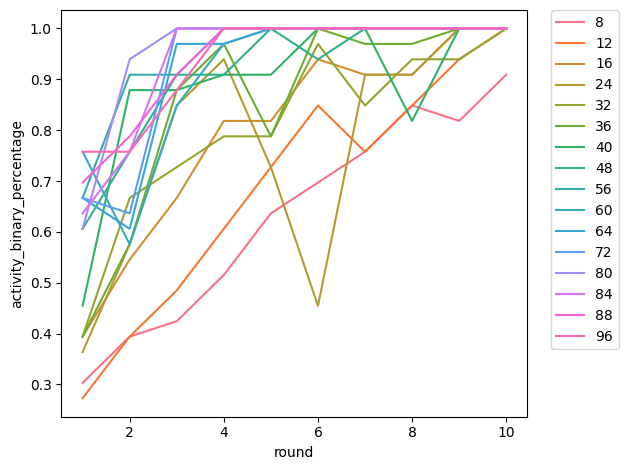

In [64]:
# plotting scaling results
sns.lineplot(
    data = scaling_data,
    x = "round",
    y = averaging_parameter,
    hue = "mutants_per_round"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()